1. Load Data

In [40]:
import numpy as np
import pandas as pd
import nltk
import pandas_profiling
import gensim
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/pingguo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pingguo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
# Load data into dataframe
df = pd.read_csv('/Users/pingguo/Desktop/BAN693/project/amazon_reviews_us_Watches.tsv', sep='\t', error_bad_lines=False)

/var/folders/cj/r4f_4mk13mzg0jl92w48tx1c0000gn/T/ipykernel_69286/3905341093.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/pingguo/Desktop/BAN693/project/amazon_reviews_us_Watches.tsv', sep='\t', error_bad_lines=False)
b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'

In [42]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [43]:
# Remove missing value
df.dropna(subset=['review_body'],inplace=True)

In [44]:
df.reset_index(inplace=True, drop=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960056 entries, 0 to 960055
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960056 non-null  object
 1   customer_id        960056 non-null  int64 
 2   review_id          960056 non-null  object
 3   product_id         960056 non-null  object
 4   product_parent     960056 non-null  int64 
 5   product_title      960054 non-null  object
 6   product_category   960056 non-null  object
 7   star_rating        960056 non-null  int64 
 8   helpful_votes      960056 non-null  int64 
 9   total_votes        960056 non-null  int64 
 10  vine               960056 non-null  object
 11  verified_purchase  960056 non-null  object
 12  review_headline    960049 non-null  object
 13  review_body        960056 non-null  object
 14  review_date        960052 non-null  object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [46]:
df_v = df['review_body'].tolist()

In [8]:
df_lowrate.shape

(216227, 15)

In [ ]:
df_lowrate = df[(df['star_rating'] == 1) | (df['star_rating']== 2) | (df['star_rating']== 3)]

In [9]:
df_lowrate.reset_index(inplace=True, drop=True)

In [10]:
df_lowrate.head(30)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
1,US,49401598,R2RHFJV0UYBK3Y,B00A4EYBR0,844009113,INFANTRY Mens Night Vision Analog Quartz Wrist...,Watches,1,1,5,N,N,I was about to buy this thinking it was a ...,I was about to buy this thinking it was a Swis...,2015-08-31
2,US,16097204,R361XSS37V0NCZ,B0039UT5OU,685450910,Casio General Men's Watches Sporty Digital AE-...,Watches,1,0,0,N,N,I do not think this watch is a good product. D...,"I bought this watch on 2013, the screen had a ...",2015-08-31
3,US,51330346,ROTNLALUAJAUB,B00MPF0XJQ,767769082,2Tone Gold Silver Cable Band Ladies Bangle Cuf...,Watches,3,0,0,N,Y,Three Stars,It is a cheap watch that looks cheap. There i...,2015-08-31
4,US,44345527,RI97MTVX08KWX,B004M23SDI,299884359,Casio F-108WH-2AEF Mens Blue Digital Watch,Watches,3,0,0,N,Y,Thought that I read somewhere that you could s...,Thought that I read somewhere that you could s...,2015-08-31
5,US,42590995,R2XHQHGXIEYTNI,B00VXLJD44,578998634,BOS Men's Automatic self-wind mechanical Point...,Watches,3,1,3,N,Y,The epitome of form before function.,This is a beautiful watch. I love the look and...,2015-08-31
6,US,36363182,R7GHUDPGT3WJC,B000GB0G5M,492842685,Casio Women's LQ139B-1B Classic Round Analog W...,Watches,3,0,0,N,Y,Nice watch but band is a little small,"Nice face, easy to read. The band is a little ...",2015-08-31
7,US,10356300,R364RU42RZ606Z,B00F8AWMXA,397647155,Invicta Men's 15256 I-Force Gunmetal Ion-Plate...,Watches,1,0,0,N,Y,One Star,crap,2015-08-31
8,US,16192612,R2XF4SMK4HKNVV,B00791YURC,310034618,Casio Men's GW2310FB-1CR G-Shock Shock Resista...,Watches,3,0,0,N,Y,Size of a woman's watch,Watch looks amazing and the features are secon...,2015-08-31
9,US,19983148,RQ70UFZVX7UVJ,B00S69FO0I,406011595,U.S. Polo Assn. Sport Men's US9506 Analog-Digi...,Watches,1,0,0,N,Y,poor quality,"Metal color was changed after the first use , ...",2015-08-31


In [11]:
low_rate_data = df_lowrate['review_body'].tolist()

2.Tokenizing and Stemming

In [50]:
stop = set(nltk.corpus.stopwords.words('english'))
stop.update(['one','would','get','even','really','could','also','want','think','actually','sure','still','guess',"'s","'m","br","watch",'know','however','through','realli','buy','two','tri','go','use','day','set','make','made','time','see','second','much','tri','first','got','problem','really','however','wear','thing','sinc','expect','never','actual','tri','look','year','month','keep','use','last', 'anoth','seem','watch','product','though','week','very','doe', 'because',])

In [51]:
from nltk import pos_tag, word_tokenize

In [52]:
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer 

stemmer = SnowballStemmer("english")
def clean(doc):
    words=nltk.word_tokenize(doc)
    nouns_adj = [word for(word,pos)in pos_tag(words)if pos.startswith('N') or pos.startswith('J')]
    lowercase=[i.lower() for i in nouns_adj if i.lower() not in stop and i.isalpha()]
    stems = [stemmer.stem(t) for t in lowercase]
   
    
    return stems
#  # stemming
#     stems = [stemmer.stem(t) for t in nouns_adj]
#     return stems

In [53]:
cleandocs = [ clean(x) for x in low_rate_data]

In [54]:
lst = []
for w in cleandocs:
    w = " ".join(w)
    lst.append(w)
data_lemmatized = ''.join(lst)

find the common_words(added it stopwords) 

In [55]:
from collections import Counter
split_it = data_lemmatized.split()
Counter = Counter(split_it)
most_common = Counter.most_common(50)
print(most_common)

[('band', 51682), ('watch', 27085), ('good', 26203), ('batteri', 24281), ('wrist', 23195), ('hand', 22445), ('face', 21909), ('qualiti', 19509), ('price', 17556), ('amazon', 16664), ('nice', 16626), ('small', 15488), ('cheap', 15387), ('great', 15055), ('strap', 15042), ('big', 13286), ('month', 12896), ('light', 12864), ('littl', 12432), ('new', 12420), ('way', 12315), ('hour', 11249), ('size', 10934), ('minut', 10593), ('color', 10538), ('dial', 10154), ('box', 10068), ('case', 10056), ('day', 9992), ('water', 9782), ('date', 9718), ('button', 9121), ('pin', 8928), ('review', 8844), ('plastic', 8726), ('pictur', 8707), ('disappoint', 8700), ('money', 8575), ('warranti', 8571), ('year', 8440), ('larg', 8367), ('function', 8313), ('bad', 8269), ('piec', 8001), ('black', 7925), ('hard', 7870), ('someth', 7834), ('work', 7795), ('link', 7791), ('number', 7597)]


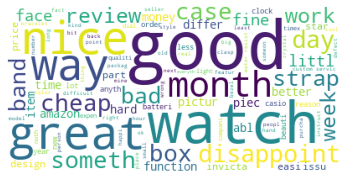

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=80,max_words=100,background_color='white').generate(data_lemmatized)
# plt.figure(figsize =(8,8),facecolor= None)
plt.imshow(wc)
plt.axis('off')
plt.show()

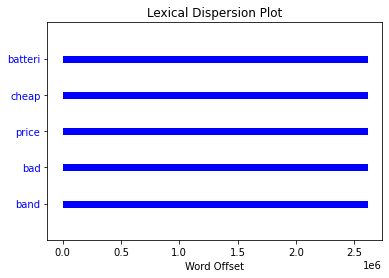

In [59]:
# Dispersion Plot
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import inaugural
import nltk
text=inaugural.raw()
wordlist=nltk.word_tokenize(str(data_lemmatized))
keywords=['batteri','cheap','price','bad','band']
dispersion_plot(wordlist,keywords) 

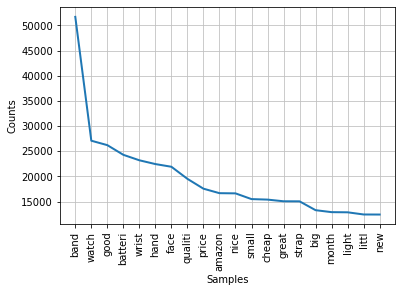

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
# word frequency plot
from nltk.corpus import brown
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import brown
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

wordlist = nltk.word_tokenize(data_lemmatized)
freqdist = nltk.FreqDist(wordlist)

freqdist.plot(20)

In [22]:
#topic modeling
# Create Dictionary
from gensim import corpora
dictionary = corpora.Dictionary(cleandocs)
# Create Corpus
texts = cleandocs
# Term Document Frequency
corpus = [dictionary.doc2bow(doc) for doc in cleandocs] # conver to a bag of words.
# View
print(corpus[:1])

[[(0, 1)]]


In [30]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

Finding the ideal number of topics by coherence plot

In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary,passes =10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [25]:
#start=2, limit=20, step=2
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=20, step=2)

In [26]:
from matplotlib import pyplot as plt

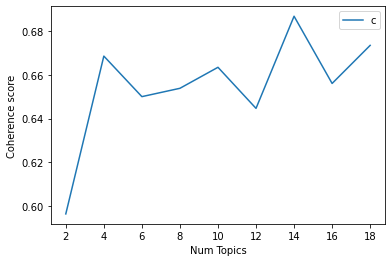

In [27]:
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [28]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5964
Num Topics = 4  has Coherence Value of 0.6686
Num Topics = 6  has Coherence Value of 0.6501
Num Topics = 8  has Coherence Value of 0.6539
Num Topics = 10  has Coherence Value of 0.6635
Num Topics = 12  has Coherence Value of 0.6447
Num Topics = 14  has Coherence Value of 0.6868
Num Topics = 16  has Coherence Value of 0.6561
Num Topics = 18  has Coherence Value of 0.6735


Visualize the topics-keywords

In [39]:

ldamodel_14 = gensim.models.LdaMulticore(corpus, num_topics=14, id2word = dictionary,minimum_probability=0)
# Compute Perplexity
print('\nPerplexity: ', ldamodel_14.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_14 = CoherenceModel(model=ldamodel_14, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda_14 = coherence_model_lda_14.get_coherence()
print('\nCoherence Score: ', coherence_lda_14)


Perplexity:  -7.504551445690608

Coherence Score:  0.6084642372466735


In [34]:
print(ldamodel_14.print_topics())
doc_lda = ldamodel_14[corpus]

[(0, '0.117*"batteri" + 0.025*"dead" + 0.022*"new" + 0.021*"good" + 0.018*"winder" + 0.018*"work" + 0.017*"day" + 0.017*"month" + 0.010*"black" + 0.010*"hand"'), (1, '0.025*"light" + 0.023*"face" + 0.019*"hand" + 0.018*"button" + 0.017*"alarm" + 0.016*"digit" + 0.015*"featur" + 0.014*"number" + 0.014*"display" + 0.012*"hard"'), (2, '0.036*"wrist" + 0.017*"small" + 0.017*"box" + 0.016*"littl" + 0.015*"face" + 0.013*"pictur" + 0.013*"bit" + 0.013*"hand" + 0.012*"blue" + 0.011*"packag"'), (3, '0.041*"band" + 0.039*"cheap" + 0.027*"color" + 0.020*"face" + 0.015*"nice" + 0.015*"plastic" + 0.015*"clasp" + 0.014*"wrist" + 0.012*"metal" + 0.012*"qualiti"'), (4, '0.016*"hand" + 0.010*"new" + 0.010*"way" + 0.010*"bad" + 0.010*"week" + 0.009*"minut" + 0.009*"watch" + 0.009*"nice" + 0.008*"qualiti" + 0.008*"day"'), (5, '0.039*"big" + 0.030*"size" + 0.029*"wrist" + 0.022*"gift" + 0.019*"nice" + 0.015*"heavi" + 0.014*"larg" + 0.014*"link" + 0.014*"band" + 0.013*"small"'), (6, '0.085*"good" + 0.039*"

In [38]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import os
%matplotlib inline

In [37]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_14 = pyLDAvis.gensim_models.prepare(ldamodel_14, corpus, dictionary)
vis_14

/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/pingguo/opt/anaconda3/lib/

/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/pingguo/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes a

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.048077  0.068510       1        1  11.781685
1      0.056432 -0.168713       2        1  11.281711
13    -0.103246  0.005493       3        1  10.300299
3     -0.087449 -0.003116       4        1   8.212847
9      0.124021  0.000629       5        1   7.860386
5     -0.085075  0.004802       6        1   7.243762
7      0.071329 -0.021948       7        1   7.120575
12     0.063274  0.092492       8        1   6.263773
0      0.079899  0.033628       9        1   5.912099
6     -0.044619  0.022534      10        1   5.371617
8     -0.069234  0.024582      11        1   5.211250
2     -0.098749 -0.032162      12        1   4.826110
10     0.014512 -0.014346      13        1   4.692829
4      0.030827 -0.012384      14        1   3.921058, topic_info=         Term          Freq         Total Category  logprob  loglift
9     batteri  28378.000000  28378.000000  Default  30.0000  30.0000
58       band  62484.000000  62484.000000  Default  29.0000  29.0000
13       good  36342.000000  36342.000000  Default  28.0000  28.0000
27      water  10391.000000  10391.000000  Default  27.0000  27.0000
23      cheap  19939.000000  19939.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
407      year    585.481580  10269.762475  Topic14  -5.2418   0.3743
58       band    721.729908  62484.010544  Topic14  -5.0326  -1.2222
84      strap    605.082196  17382.480724  Topic14  -5.2089  -0.1190
40   function    558.514738   9831.470491  Topic14  -5.2890   0.3707
212      hour    567.483536  12315.399938  Topic14  -5.2731   0.1614

[1263 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
326       1  0.040496     abl
326       2  0.128724     abl
326       3  0.231600     abl
326       4  0.031190     abl
326       5  0.106150     abl
...     ...       ...     ...
7329      4  0.011555  zenith
7329     12  0.982181  zenith
6055      1  0.932184  zipper
6055     10  0.012947  zipper
6055     14  0.038841  zipper

[6207 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 2, 14, 4, 10, 6, 8, 13, 1, 7, 9, 3, 11, 5])